# Generating images

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter
from pathlib import Path

### Pandas options

In [2]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

## File paths

In [3]:
root = Path()
info_path = root / 'info'
data_proc = root / 'data' / 'data_proc'
out_path =root / 'output'
out_path.mkdir(exist_ok=True)
out_tables = out_path / 'exracted_tables'
out_tables.mkdir(exist_ok=True)
data_file_name = out_tables / 'collected_data_full.pkl'
stats_file_name = out_tables / 'stats_full_subj_protocol.pkl'
out_path.mkdir(exist_ok=True)
save_fig_path = out_path / 'figs'
exp_fig_path = save_fig_path / 'experiments'
save_fig_path.mkdir(exist_ok=True)
exp_fig_path.mkdir(exist_ok=True)

## Reading collected data

In [4]:
df = pd.read_pickle(data_file_name)
df.head()

Subject           S001                                                     \
Experiment          03                                       04             
Activity    Left Right                               Left Right             
Type              Real                                Imaginary             
Channel             32        37        49        54         32        37   
Time Window                                                                 
4             0.790723  0.751890  0.623338  0.555156   0.770331  0.725074   
5             0.804095  0.767576  0.621471  0.551268   0.781702  0.739401   
7             0.826315  0.792916  0.634373  0.563226   0.802250  0.764650   
9             0.842069  0.810097  0.653999  0.584347   0.816864  0.781835   
11            0.852940  0.821543  0.673912  0.607239   0.826941  0.792922   

Subject                                                                  \
Experiment                             05                                 
Activity                         Top Down                                 
Type                                 Real                                 
Channel            49        54        32        37        49        54   
Time Window                                                               
4            0.614782  0.537716  0.787173  0.749111  0.616659  0.554667   
5            0.611567  0.532371  0.796623  0.760533  0.614017  0.547369   
7            0.621119  0.541242  0.814352  0.781812  0.625371  0.554958   
9            0.639234  0.561407  0.827210  0.796823  0.643471  0.574024   
11           0.660049  0.585602  0.835431  0.806117  0.661218  0.595489   

Subject                                                                   \
Experiment         06                                       07             
Activity     Top Down                               Left Right             
Type        Imaginary                                     Real             
Channel            32        37        49        54         32        37   
Time Window                                                                
4            0.795397  0.757555  0.592490  0.514811   0.630554  0.529373   
5            0.810957  0.776999  0.596201  0.517739   0.662161  0.575389   
7            0.834600  0.805521  0.615624  0.537734   0.716127  0.648817   
9            0.849330  0.822277  0.639282  0.563687   0.755392  0.699317   
11           0.857853  0.831066  0.662792  0.590589   0.782707  0.733093   

Subject                                                                   \
Experiment                              08                                 
Activity                        Left Right                                 
Type                             Imaginary                                 
Channel            49        54         32        37        49        54   
Time Window                                                                
4            0.566759  0.486477   0.742195  0.689640  0.582160  0.490351   
5            0.568198  0.486106   0.761490  0.712933  0.590513  0.494355   
7            0.585409  0.502358   0.789450  0.746078  0.616211  0.518088   
9            0.608814  0.526420   0.806457  0.765416  0.642664  0.547410   
11           0.632531  0.552010   0.816608  0.776323  0.666118  0.576149   

Subject                                                                  \
Experiment         09                                      10             
Activity     Top Down                                Top Down             
Type             Real                               Imaginary             
Channel            32        37        49        54        32        37   
Time Window                                                               
4            0.716505  0.658090  0.601072  0.530982  0.768173  0.721563   
5            0.736385  0.685218  0.596458  0.524580  0.781769  0.738551   
7            0.769182  0.726875  0.606549  0.533459 

In [5]:
df_stats = pd.read_pickle(stats_file_name)
df_stats = df_stats.reorder_levels(order=[0,4,1,2,3], axis=1)
df_stats.columns.set_names('Experiment', level=1, inplace=True)
df_stats.head()

Subject           S001                                                         \
Experiment        mean     median        std    std pop       mean     median   
Activity    Left Right Left Right Left Right Left Right Left Right Left Right   
Type         Imaginary  Imaginary  Imaginary  Imaginary  Imaginary  Imaginary   
Channel             32         32         32         32         37         37   
Time Window                                                                     
4             0.760115   0.767819   0.015570   0.012713   0.712169   0.721792   
5             0.775095   0.781702   0.011784   0.009622   0.730458   0.739040   
7             0.798796   0.802250   0.008186   0.006683   0.758613   0.764650   
9             0.814346   0.816864   0.006979   0.005699   0.776269   0.781556   
11            0.824190   0.826941   0.006648   0.005428   0.786787   0.791116   

Subject                                                                        \
Experiment         std    std pop       mean     median        std    std pop   
Activity    Left Right Left Right Left Right Left Right Left Right Left Right   
Type         Imaginary  Imaginary  Imaginary  Imaginary  Imaginary  Imaginary   
Channel             37         37         49         49         49         49   
Time Window                                                                     
4             0.019579   0.015986   0.588213   0.582160   0.024119   0.019693   
5             0.015178   0.012393   0.592179   0.590513   0.018611   0.015196   
7             0.010858   0.008866   0.612099   0.616211   0.011634   0.009499   
9             0.009400   0.007675   0.635807   0.639234   0.009070   0.007406   
11            0.009107   0.007436   0.658666   0.660049   0.008232   0.006721   

Subject                                                                        \
Experiment        mean     median        std    std pop       mean     median   
Activity    Left Right Left Right Left Right Left Right Left Right Left Right   
Type         Imaginary  Imaginary  Imaginary  Imaginary       Real       Real   
Channel             54         54         54         54         32         32   
Time Window                                                                     
4             0.507069   0.493141   0.026577   0.021700   0.731048   0.771867   
5             0.507842   0.496800   0.021278   0.017373   0.749314   0.781686   
7             0.525909   0.518397   0.013280   0.010843   0.780484   0.799010   
9             0.551271   0.547410   0.008861   0.007235   0.802943   0.811369   
11            0.577690   0.576149   0.007265   0.005932   0.818416   0.819600   

Subject                                                                        \
Experiment         std    std pop       mean     median        std    std pop   
Activity    Left Right Left Right Left Right Left Right Left Right Left Right   
Type              Real       Real       Real       Real       Real       Real   
Channel             32         32         37         37         37         37   
Time Window                                                                     
4             0.087540   0.071476   0.672233   0.735436   0.123994   0.101240   
5             0.076304   0.062302   0.696684   0.747087   0.105543   0.086175   
7             0.057383   0.046853   0.736201   0.766870   0.076789   0.062698   
9             0.043948   0.035884   0.763107   0.779908   0.057269   0.046760   
11            0.035131   0.028685   0.780752   0.787619   0.044623   0.036435   

Subject                                                                        \
Experiment        mean     median        std    std pop       mean     median   
Activity    Left Right Left Right Left Right Left Right Left Right Left Right   
Type              Real       Real       Real       Real       Real       Real   
Channel             49         49         49         49         54         54   
Time Window                

## Generating images for all the subjects

D:\users\Nando\AppData\Local\Temp\ipykernel_2232\1888179370.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
D:\users\Nando\AppData\Local\Temp\ipykernel_2232\1888179370.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
D:\users\Nando\AppData\Local\Temp\ipykernel_2232\1888179370.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
D:\users\Nando\AppData\Local\Temp\ipykernel_2232\1888179370.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


END


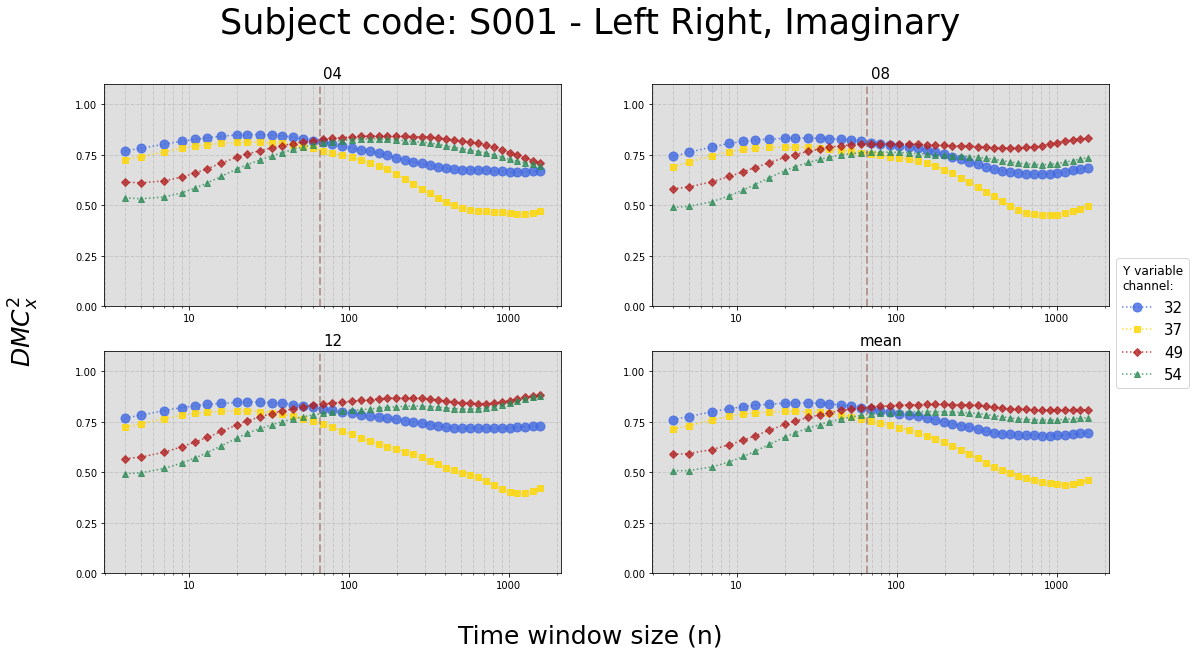

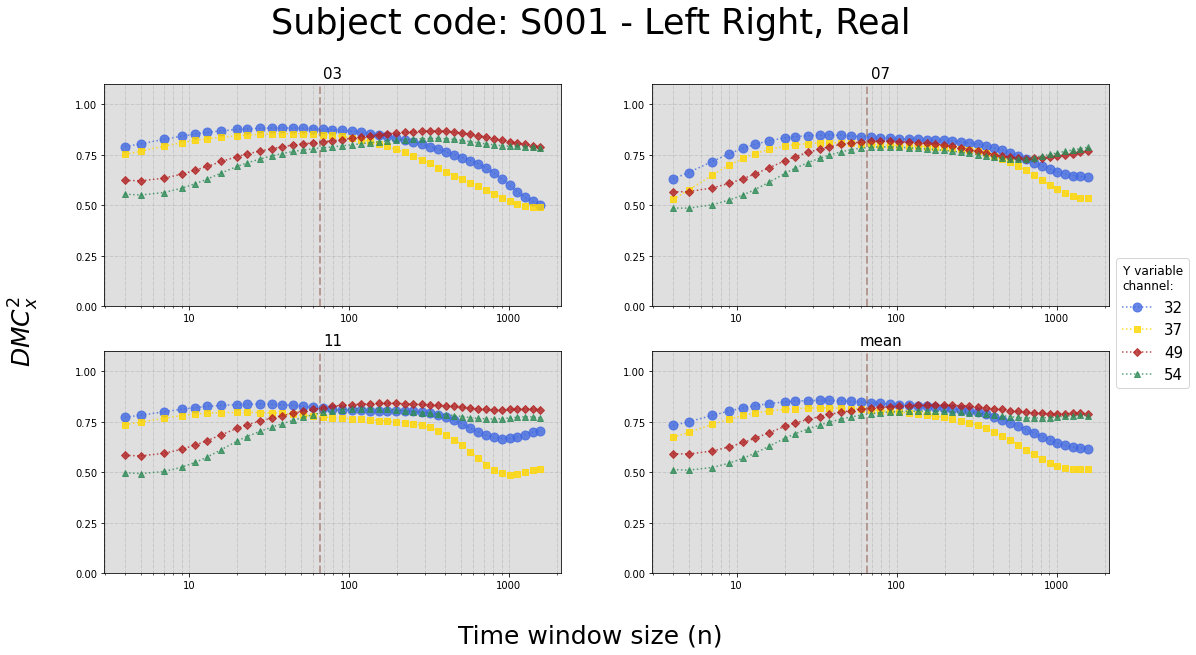

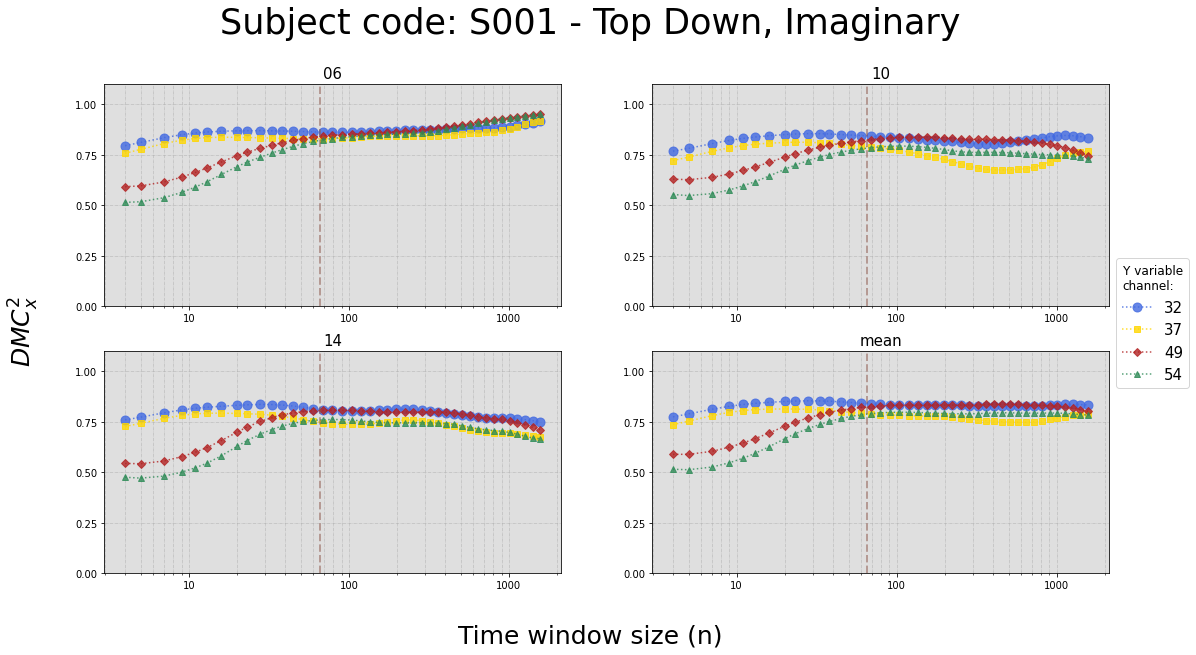

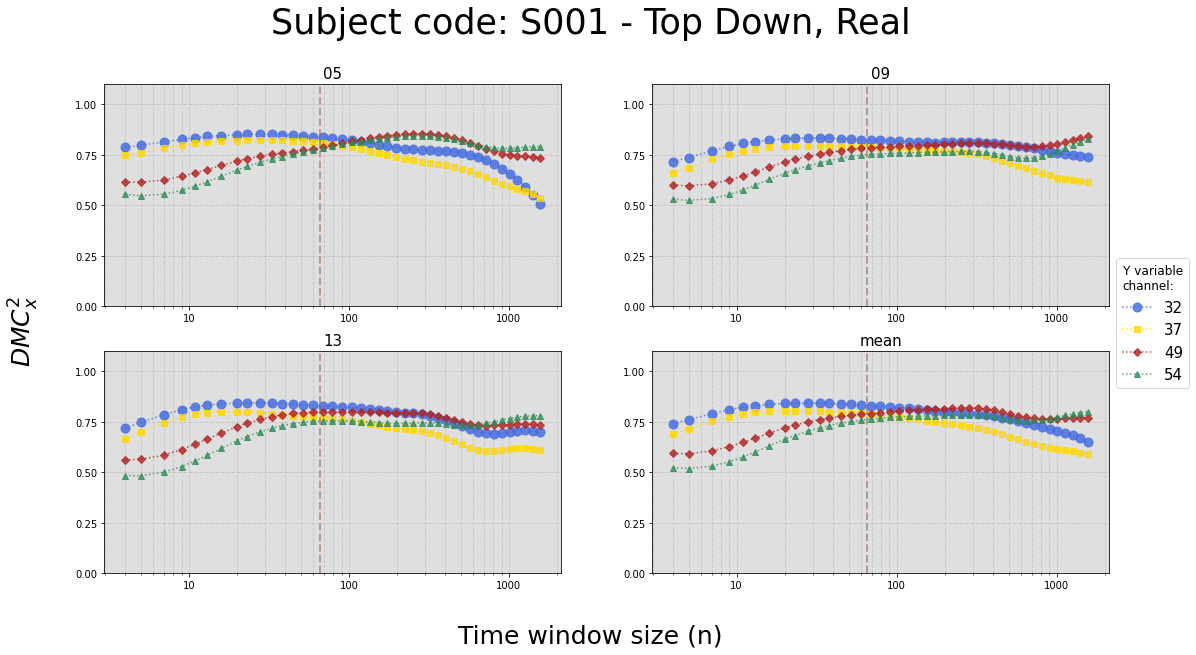

In [26]:
# image options
color = ['royalblue',  'gold', 'firebrick', 'seagreen']
marks = ['o',  's', 'D', '^' ]
mrk_size = [1.5, 1, 1 ,1.1]
use_title = True


# log ticks formatting
formatter_x = ScalarFormatter()
formatter_x.set_scientific(False)

# Configure or save image options
img_config = True
max_display_img_config = 1

stat_name = 'mean'

col_lev_list = df.columns.levels

subj_list = col_lev_list[0]

exp_protocol_list = pd.MultiIndex.from_product( df.columns.levels[2:4])

channels = col_lev_list[4]

if img_config ==  True:
    subj_list = subj_list[:max_display_img_config]

# for each subject
for subj_code in subj_list:

    for exp_protocol in exp_protocol_list:
        # create plot
        fig,ax = plt.subplots(2,2, figsize=(18,9))
        # slice dataframes
        df_aux = df.loc[:, ([subj_code], slice(None), [exp_protocol[0]], [exp_protocol[1]], slice(None) ) ]
        df_aux_2= df_stats.loc[:, ([subj_code], [stat_name], [exp_protocol[0]], [exp_protocol[1]], slice(None) ) ]
        # create dataframe list
        df_aux.columns = df_aux.columns.remove_unused_levels()
        exp_id_list = list(df_aux.columns.levels[1])
        exp_id_list.append(stat_name)

        # auxiliary dataframe for figures generation
        df_aux = pd.concat([ df_aux, df_aux_2], axis=1)

        if use_title == True:
            fig.suptitle('Subject code: {} - {}, {}'.format(subj_code, exp_protocol[0], exp_protocol[1] ), fontsize=35, y=1)

        fig.supylabel('$DMC_{x}^{2}$', fontsize=25, x=0.05)
        fig.supxlabel('Time window size (n)', fontsize=25)

        min_y = 0
        max_y = 1.1

        # for each experiment
        for  i_ex, exp  in enumerate(exp_id_list):
            df_exp = df_aux.loc[:, (slice(None), [exp], slice(None), slice(None), slice(None) ) ]

            fig_row = i_ex//2
            fig_col = i_ex%2

            ax[fig_row][fig_col].set_title(exp , fontsize=15)

            ax[fig_row][fig_col].set_ylim([min_y, max_y])

            ax[fig_row][fig_col].set_facecolor("#dfdfdf")
            #ax[fig_row][fig_col].loglog()
            ax[fig_row][fig_col].semilogx()
        
            ax[fig_row][fig_col].xaxis.set_major_formatter(formatter_x)
            ax[fig_row][fig_col].set_yticks(np.arange(0,1.1,0.25))
            ax[fig_row][fig_col].grid(visible=True, which='both', axis='both',  linestyle='dashdot', linewidth=.5)
            

            # for each channel
            for i_ch , chan in enumerate(channels):

                ax[fig_row][fig_col].plot(df_exp.index.values, df_exp.loc[:, (slice(None), slice(None), slice(None), slice(None),[chan]) ], c= color[i_ch], marker=marks[i_ch], label = chan, markersize=6* mrk_size[i_ch],  linestyle=':', alpha=.8 ,linewidth=1.5)

            ax[fig_row][fig_col].axvline(x=65.6, color='tab:brown', linestyle='dashed',alpha=.50,linewidth=2)

        ax[1,1].legend( title = "Y variable\nchannel:", title_fontsize=12, bbox_to_anchor=(1,1.45), loc='upper left',  prop={'size': 15})

        # config or save images
        if img_config == True:
            fig.show()
        else:
            fig_file_name = exp_fig_path / (subj_code + '_' + '_'.join(exp_protocol) + '.jpg')
            fig.savefig(fig_file_name)
            plt.close()
            fig.clf()
            print(subj_code, end="...")
print('END')
       